In [135]:
import numpy as np
import pandas as pd
from math import e, inf, sqrt
import random
from PIL import Image
import matplotlib.pyplot as plt

def sig(x):
    y = 1/(1 + np.exp(-x))
    return y

def sigDeriv(x):
    y = sig(x)*(1-sig(x))
    return y
x = np.array([1,2,3])
sigDeriv(x)



array([0.19661193, 0.10499359, 0.04517666])

In [136]:
dat = pd.read_csv("handwritten digits (images).csv",dtype=int)
numOfDatasets = len(dat)
dat

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [137]:
TrainingData = pd.DataFrame(dat.iloc[:, 1:]).to_numpy(copy=True, dtype=np.int32)
mean = np.mean(TrainingData)
std = np.std(TrainingData)
TrainingData = (TrainingData - mean)/std
sum(TrainingData[0,:])

-121.28699186719702

correct ans: 2


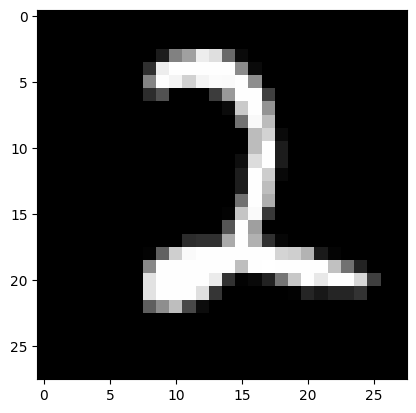

In [138]:
def DataColToImage(x):
    image = Image.fromarray(TrainingData[x, :].reshape(28,28) * std + mean)
    plt.imshow(image)
    print("correct ans:", dat.iloc[x, 0])
DataColToImage(random.randint(0,42000))

In [139]:
TrainingData[1, :].shape

(784,)

In [140]:
x = np.array([[1,2,3],
              [1,2,3]])

y = np.array([[1,2,3]])

y.shape

(1, 3)

In [141]:
inputNumber = 784
Hidden1NeuronCount = 20
Hidden2NeuronCount = 20 
outputCount = 10
learningRate = 0.01

# all weights from each row will lead to same neuron of the next layer 
# all weights from same column will act on same neuron of current layer
# first row weights are all weights that lead to first neuron in the next layer, etc
# first column weights are all weights that act on first neuron of current layer 
# weight.T = [all weights that act on first neuron of current layer]
#          [all weights that act on second neuron of current layer], etc...
# weight = [all weights that lead to first neuron of next layer]
#            [all weights that lead to second neuron of next layer], etc... 
# data will be a single column
# next layer calculated will be single column with all neurons (good)
# h,g,f,H,G,F == inactivated and activated hidden layers and final layers respectively

weights1 = np.random.uniform(-0.5,0.5,(Hidden1NeuronCount, inputNumber))
weights2 = np.random.uniform(-0.5,0.5,(Hidden2NeuronCount, Hidden1NeuronCount))
weights3 = np.random.uniform(-0.5,0.5,(outputCount, Hidden2NeuronCount))

biases1 = np.random.uniform(-0.1,0.1,(Hidden1NeuronCount, 1))
biases2 = np.random.uniform(-0.2,0.2,(Hidden2NeuronCount, 1))
biases3 = np.random.uniform(-0.3,0.3,(outputCount,1))

print(weights1.shape, weights2.shape, weights3.shape)
sig(weights1)

(20, 784) (20, 20) (10, 20)


array([[0.49818127, 0.53979692, 0.57969621, ..., 0.56068424, 0.40736372,
        0.51600681],
       [0.51282688, 0.5289892 , 0.38028283, ..., 0.49121665, 0.40122788,
        0.47877816],
       [0.51401308, 0.39466362, 0.40486698, ..., 0.46730586, 0.55291562,
        0.4652139 ],
       ...,
       [0.49341404, 0.42524262, 0.39586596, ..., 0.43217827, 0.50291248,
        0.47109587],
       [0.37974857, 0.58495473, 0.40793622, ..., 0.40009458, 0.4378709 ,
        0.54207057],
       [0.46152991, 0.38425629, 0.50981929, ..., 0.39843517, 0.52578264,
        0.51008492]])

In [142]:
def softmax(x):
    return np.exp(x) / np.sum(np.exp(x))

def test():
    randomTest = random.randint(0,42000-1)
    prams = forwardProp(randomTest, weights1, weights2, weights3, biases1, biases2, biases3)
    modelAns, hidden1, hidden2, finallayer, UnactivatedHidden1, UnativatedHidden2, UnactivatedFinalLayer, data = prams
    ans = finallayer
    cost = np.sum((modelAns - finallayer)**2)
    DataColToImage(randomTest)
    print("predicted:", ans.argmax())
    return ans

def testMany(n):
    correct = 0
    wrong = 0
    for i in range(0, n):
        randomTest = random.randint(0,42000-1)
        finallayer = forwardProp(randomTest, weights1, weights2, weights3, biases1, biases2, biases3)[3]
        ans = softmax(finallayer)
        pred = ans.argmax()
        corr = int(dat.iloc[randomTest, 0])
        if pred == corr:
            correct += 1
        else:
            wrong += 1
    print("accuracy:", str((correct/(correct + wrong))*100) + "%" , flush=False)



In [143]:
def forwardProp(x, weight1, weight2, weight3, bias1, bias2, bias3):
    data = TrainingData[x,:].reshape(784,1)
    
    UnactivatedHidden1 = np.dot(weight1, data)
    hidden1 = sig(UnactivatedHidden1) + bias1

    UnativatedHidden2 = np.dot(weight2, hidden1)
    hidden2 = sig(UnativatedHidden2) + bias2

    UnactivatedFinalLayer = np.dot(weight3, hidden2)
    finalLayer = sig(UnactivatedFinalLayer) + bias3

    correctAns = dat.iloc[x,0]
    modelAns = np.zeros((1,10)) # create empty array
    modelAns[0,correctAns] = 1 # make the correct index become 1 rest remain 0
    return [modelAns, hidden1, hidden2, finalLayer, UnactivatedHidden1, UnativatedHidden2, UnactivatedFinalLayer, data]

forwardProp(1, weights1, weights2, weights3, biases1, biases2, biases3) #[3].shape

[array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]]),
 array([[ 1.05382548],
        [ 0.01542781],
        [ 0.05422301],
        [-0.09296105],
        [ 0.00341322],
        [ 0.29590363],
        [-0.00965337],
        [ 0.0035426 ],
        [ 0.01663677],
        [ 1.03649953],
        [-0.00599881],
        [ 1.05300776],
        [ 1.07839941],
        [ 0.88093593],
        [-0.01737075],
        [ 0.80621321],
        [ 0.06125178],
        [ 0.93277365],
        [ 0.05545836],
        [ 0.76266733]]),
 array([[0.10378829],
        [0.7019551 ],
        [0.27756594],
        [0.12095711],
        [0.53623871],
        [0.57714344],
        [0.59044046],
        [0.7275616 ],
        [0.44799006],
        [0.59645318],
        [0.19239244],
        [0.48753743],
        [0.66924302],
        [0.70216707],
        [0.68607793],
        [0.35054887],
        [0.63114722],
        [0.28934977],
        [0.82402963],
        [0.54521617]]),
 array([[0.49674401],
        [0.47094784],


In [144]:
biases3



array([[ 0.05693166],
       [-0.04669347],
       [ 0.22341231],
       [ 0.16281524],
       [-0.27158436],
       [ 0.22449317],
       [-0.19189846],
       [-0.14791517],
       [-0.27527918],
       [ 0.10046336]])

In [145]:
x = np.array(([1,2,3],
             [1,2,3]))
np.sum(x, 0)

array([2, 4, 6])

In [146]:
def backProp(params):
    global weights1, weights2, weights3, biases1, biases2, biases3
    modelAns, H, G, F, h, g, f, data = params
    modelAns = modelAns.reshape(10,1)
    cost = np.mean((modelAns - F)**2)
    print("cost:", cost)
    
    dCdF = -2*(modelAns - F)
    dCdf = dCdF * sigDeriv(f)

    dCdG = np.sum(dCdf * weights3, 0).reshape(20,1)

    dCostdWeights3 = np.ones_like(weights3) * G.reshape(1, Hidden2NeuronCount) * dCdf
    
    dGdg = sigDeriv(g)

    dCdH = np.sum((dGdg * dCdG) * weights2, 0).reshape(20,1)

    dCostdWeights2 = np.ones_like(weights2) * H.reshape(1, Hidden1NeuronCount) * dCdG * dGdg

    dHdh = sigDeriv(h)

    dCostdWeights1 = np.ones_like(weights1) * data.reshape(1, inputNumber) * dCdH * dHdh

    dCostdBiases3 = dCdF # this is prb not the gradient wrt to the bias but rather proportionate number to the amt u want the bias to change
    dCostdBiases2 = dCdG 
    dCostdBiases1 = dCdH
    weights3 -= dCostdWeights3 * learningRate
    weights2 -= dCostdWeights2 * learningRate
    weights1 -= dCostdWeights1 * learningRate
    biases3 -= dCostdBiases3 * learningRate
    biases2 -= dCostdBiases2 * learningRate
    biases1 -= dCostdBiases1 * learningRate
    return #cost

backProp(forwardProp(3, weights1, weights2, weights3, biases1, biases2, biases3))

cost: 0.2981870318874714


In [147]:
for i in range(42000):
    backProp(forwardProp(i, weights1, weights2, weights3, biases1, biases2, biases3))


cost: 0.3108312292285356
cost: 0.2942031271261116
cost: 0.2587356977785304
cost: 0.2539800378466638
cost: 0.25969955244545095
cost: 0.24912107673034406
cost: 0.24753553416101343
cost: 0.2419168685908927
cost: 0.21015752439477095
cost: 0.25453666512603457
cost: 0.2199920548076825
cost: 0.13881470030417958
cost: 0.19407958718065624
cost: 0.1944245656464371
cost: 0.1979062274981179
cost: 0.16764397498669403
cost: 0.156866338388493
cost: 0.17686395518433623
cost: 0.16629312259287582
cost: 0.15607292752131624
cost: 0.18076360806195044
cost: 0.17271835885793538
cost: 0.13264274191103778
cost: 0.1379114654617813
cost: 0.11561115244044295
cost: 0.15504170746710583
cost: 0.1561614253820332
cost: 0.09961897772173875
cost: 0.09554895198492618
cost: 0.15202426929343596
cost: 0.13703043642686968
cost: 0.08351649554082911
cost: 0.15093644642708248
cost: 0.08249106245379562
cost: 0.09157573586339454
cost: 0.11845136895876633
cost: 0.12912694197889713
cost: 0.1154268091634539
cost: 0.10101810386320316

correct ans: 1
predicted: 1
accuracy: 85.0%


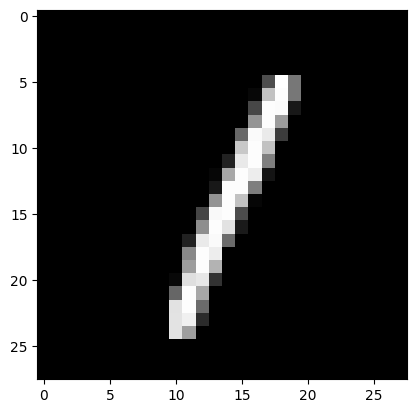

In [166]:
test()
testMany(100)